<a href="https://colab.research.google.com/github/spanme/01knapsack/blob/master/datacleanup.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**To run, execute the code below and then choose the dataset file to be explored.**

In [1]:
from google.colab import files
import pandas as pd
from sklearn.model_selection import train_test_split
from zipfile import ZipFile
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
uploaded = files.upload() #manually upload the zip of data??

Saving HeartDataCE101.zip to HeartDataCE101.zip


In [2]:
file_name = "HeartDataCE101.zip"
with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print("done") #extract the data from the .zip

done


In [3]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')
import plotly.graph_objs as go
import plotly.offline as py
df=pd.read_csv('heart.csv')


In [4]:
df.isnull().sum() #check for null values

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [5]:
df_dup = df.duplicated().any() #bool checks for any dupe records
print(df_dup)
df = df.drop_duplicates() #rid of duplicates
df_dup = df.duplicated().any()
print(df_dup) #verifies indeed we have no more duplicate values

True
False


In [6]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
#rename stuff
 #some style, dataframe object = to database.
df.columns = ['Age', 'Sex', 'Chest_pain_type', 'Resting_bp',
              'Cholesterol', 'Fasting_bs', 'Resting_ecg',
              'Max_heart_rate', 'Exercise_induced_angina',
              'ST_depression', 'ST_slope', 'Num_major_vessels',
              'Thallium_test', 'Condition']
df.head()


,Age,Sex,Chest_pain_type,Resting_bp,Cholesterol,Fasting_bs,Resting_ecg,Max_heart_rate,Exercise_induced_angina,ST_depression,ST_slope,Num_major_vessels,Thallium_test,Condition
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [8]:
#pre-processing
cate_val = [] #categorical columns
cont_val  = [] #numerical/continuous data columns
for column in df.columns:
  if df[column].nunique() <=10:
    cate_val.append(column)
  else:
    cont_val.append(column)
#so the idea here is that if there are less than 10 unique values in a column its a categorical thing, more makes it numerical
#i suppose this might make sense, maybe there are a limited amount of times of things.


In [9]:
cate_val

['Sex',
 'Chest_pain_type',
 'Fasting_bs',
 'Resting_ecg',
 'Exercise_induced_angina',
 'ST_slope',
 'Num_major_vessels',
 'Thallium_test',
 'Condition']

In [10]:
cont_val

['Age', 'Resting_bp', 'Cholesterol', 'Max_heart_rate', 'ST_depression']

In [11]:
df['Chest_pain_type'].unique() #these are the values chest pain type can hold
#some ML models may think there is an order here in [3,2,1,0], but there isn't in reality

array([3, 2, 1, 0])

In [ ]:
#need to avoid dummy variable trap below
#an example of this is using a tuple to mean Red, Green or Blue. (1,0,0) or a 3-tuple is not good (the trap), as a 2-tuple suffices. (1,0) for Red, (0,1) for Blue and (0,0) for Green.
#apparently scikit is supposed to stop this happening automatically, but i don't know.
cate_val.remove('Sex')
cate_val.remove("Condition") #these are already binary, so dont need
df = pd.get_dummies(df, columns=cate_val, drop_first = True) # so this line is turning each value into a vector, and we drop the first column as a 0 vector can be used to predict one more type of value, as above.



In [12]:
df.head(5)

,Age,Sex,Chest_pain_type,Resting_bp,Cholesterol,Fasting_bs,Resting_ecg,Max_heart_rate,Exercise_induced_angina,ST_depression,ST_slope,Num_major_vessels,Thallium_test,Condition
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
#feature scaling (also called Z-score normalisation), s.t. each value has a standard dev of 1 and a mean of 0
#apparently, this stops one+ variables being too dominant in the model
#we dont require feature scaling for categorical values because they are all changed to binary values, i think
from sklearn.preprocessing import StandardScaler
st = StandardScaler()
df[cont_val] = st.fit_transform(df[cont_val]) #fit_transform is supposed to do exactly as above wrt to s.d and mean
df.head()

,Age,Sex,Resting_bp,Cholesterol,Max_heart_rate,ST_depression,Condition,Chest_pain_type_1,Chest_pain_type_2,Chest_pain_type_3,...,Exercise_induced_angina_1,ST_slope_1,ST_slope_2,Num_major_vessels_1,Num_major_vessels_2,Num_major_vessels_3,Num_major_vessels_4,Thallium_test_1,Thallium_test_2,Thallium_test_3
0,0.949794,1,0.764066,-0.261285,0.018826,1.084022,1,False,False,True,...,False,False,False,False,False,False,False,True,False,False
1,-1.928548,1,-0.091401,0.067741,1.636979,2.118926,1,False,True,False,...,False,False,False,False,False,False,False,False,True,False
2,-1.485726,0,-0.091401,-0.822564,0.980971,0.307844,1,True,False,False,...,False,False,True,False,False,False,False,False,True,False
3,0.174856,1,-0.661712,-0.203222,1.243374,-0.209608,1,True,False,False,...,False,False,True,False,False,False,False,False,True,False
4,0.285561,0,-0.661712,2.080602,0.587366,-0.382092,1,False,False,False,...,True,False,True,False,False,False,False,False,True,False


In [27]:
#Split the dataset into the training set and test set, which lets us evaluate the performance of the algorithms.
X = df.drop("Condition",axis=1) #independent variables
y = df['Condition'] #dependent/target variable


# Split into training (70%) and temporary (30%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42) #a training dataset is exactly what it sounds like

# Split temporary set equally into validation and testing (15% each of total data)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42) #a validation dataset is supposed to be like a secondary training phase, where we can again change behaviour.
#testing dataset is as it sounds

print("Training set size:", X_train.shape[0])
print("Validation set size:", X_val.shape[0])
print("Testing set size:", X_test.shape[0])


Training set size: 211
Validation set size: 45
Testing set size: 46


In [28]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression

log = LogisticRegression()
log.fit(X_train, y_train)
y_pred1 = log.predict(X_test) #using test data here and from now on, should probably switch to val and then rerun or something?
accuracy_score(y_test,y_pred1)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



0.782608695652174

In [29]:
from sklearn import svm
svm = svm.SVC()
svm.fit(X_train, y_train)
y_pred2 = svm.predict(X_test)
accuracy_score(y_test,y_pred2)
#

0.7391304347826086

In [30]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred3 = knn.predict(X_test)
accuracy_score(y_test,y_pred3)


0.6956521739130435

In [31]:
#nonlinear ML algos, dont need preprocessing, encoding (turning chest pain into a vector) or feature scaling
data = pd.read_csv('heart.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [32]:
data.drop_duplicates()
data.shape

(303, 14)

In [33]:
X = data.drop('target', axis=1)
y = data['target']
# Split into training (70%) and temporary (30%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42) #a training dataset is exactly what it sounds like

# Split temporary set equally into validation and testing (15% each of total data)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42) #a validation dataset is supposed to be like a secondary training phase, where we can again change behaviour.

In [34]:
#DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred4 = dt.predict(X_test)
accuracy_score(y_test,y_pred4)

0.7608695652173914

In [35]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred5 = rf.predict(X_test)
accuracy_score(y_test,y_pred5)

0.7391304347826086

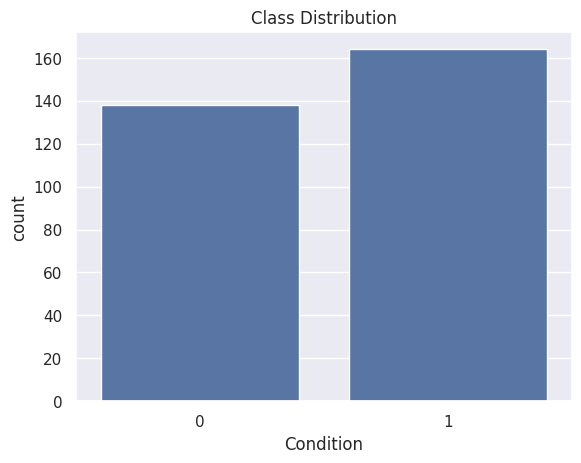

Condition
1    164
0    138
Name: count, dtype: int64


In [39]:
# Check class distribution
sns.countplot(x=df['Condition'])
plt.title("Class Distribution")
plt.show()

# Print the actual counts
print(df['Condition'].value_counts())

#check for class imbalances - if the dataset has a lot of one type and
#the ML is biased to find that type, it will yield a false high accuracy.

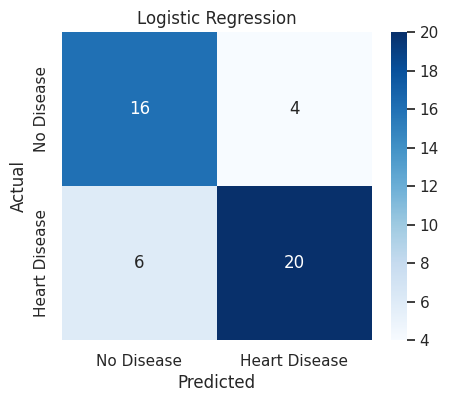

              precision    recall  f1-score   support

           0       0.73      0.80      0.76        20
           1       0.83      0.77      0.80        26

    accuracy                           0.78        46
   macro avg       0.78      0.78      0.78        46
weighted avg       0.79      0.78      0.78        46



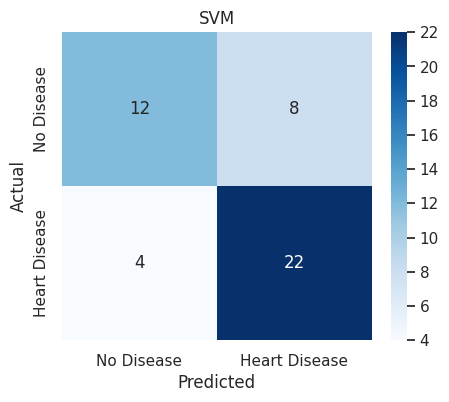

              precision    recall  f1-score   support

           0       0.75      0.60      0.67        20
           1       0.73      0.85      0.79        26

    accuracy                           0.74        46
   macro avg       0.74      0.72      0.73        46
weighted avg       0.74      0.74      0.73        46



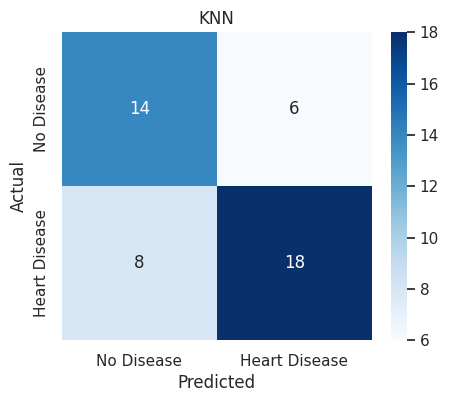

              precision    recall  f1-score   support

           0       0.64      0.70      0.67        20
           1       0.75      0.69      0.72        26

    accuracy                           0.70        46
   macro avg       0.69      0.70      0.69        46
weighted avg       0.70      0.70      0.70        46



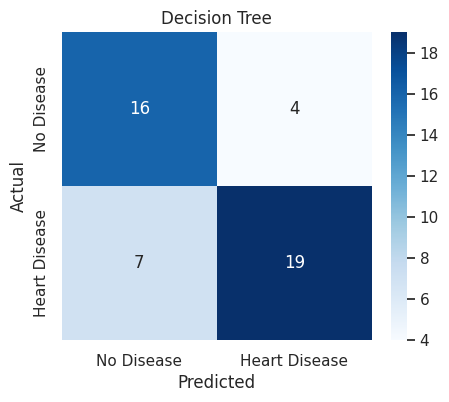

              precision    recall  f1-score   support

           0       0.70      0.80      0.74        20
           1       0.83      0.73      0.78        26

    accuracy                           0.76        46
   macro avg       0.76      0.77      0.76        46
weighted avg       0.77      0.76      0.76        46



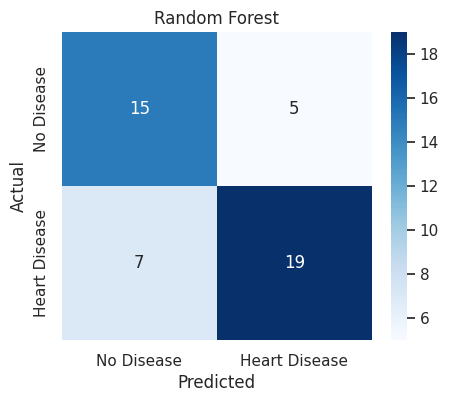

              precision    recall  f1-score   support

           0       0.68      0.75      0.71        20
           1       0.79      0.73      0.76        26

    accuracy                           0.74        46
   macro avg       0.74      0.74      0.74        46
weighted avg       0.74      0.74      0.74        46



In [40]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Function to plot confusion matrix
def plot_confusion_matrix(y_test, y_pred, title):
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Disease", "Heart Disease"], yticklabels=["No Disease", "Heart Disease"])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(title)
    plt.show()

# Confusion matrices for each model
#top left true negative, good.
#top right false positive, bad. fix: increase recall.
#bottom left false negative, bad. fix: increase precision.
#bottom right, true positive, good.
plot_confusion_matrix(y_test, y_pred1, "Logistic Regression")
print(classification_report(y_test, y_pred1))
plot_confusion_matrix(y_test, y_pred2, "SVM")
print(classification_report(y_test, y_pred2))
plot_confusion_matrix(y_test, y_pred3, "KNN")
print(classification_report(y_test, y_pred3))
plot_confusion_matrix(y_test, y_pred4, "Decision Tree")
print(classification_report(y_test, y_pred4))
plot_confusion_matrix(y_test, y_pred5, "Random Forest")
print(classification_report(y_test, y_pred5))
#precision - proportion of true positive results out of all positive predictions
#recall    - proportion of true positives out of all actual positives
#f1-score, harmonic mean of precision and recall, a balance.
#support - number of occurances of the class

Best Parameters found by Grid Search:
{'C': 0.1, 'max_iter': 200, 'penalty': 'l2', 'solver': 'liblinear'}
Accuracy: 78.26%


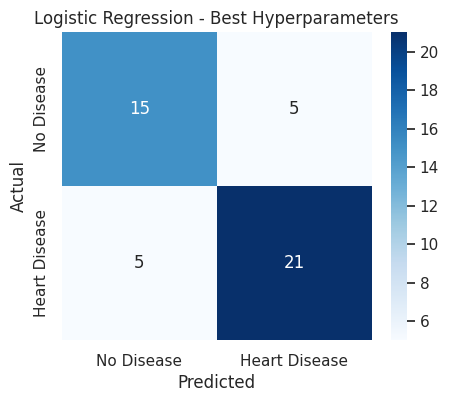

              precision    recall  f1-score   support

           0       0.75      0.75      0.75        20
           1       0.81      0.81      0.81        26

    accuracy                           0.78        46
   macro avg       0.78      0.78      0.78        46
weighted avg       0.78      0.78      0.78        46

Accuracy after resampling: 76.09%


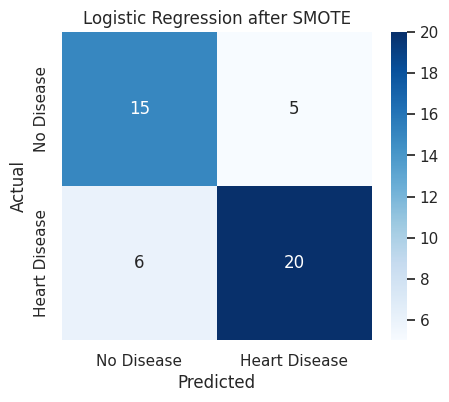

              precision    recall  f1-score   support

           0       0.71      0.75      0.73        20
           1       0.80      0.77      0.78        26

    accuracy                           0.76        46
   macro avg       0.76      0.76      0.76        46
weighted avg       0.76      0.76      0.76        46



In [43]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Step 1: Define your model
log_reg = LogisticRegression()

# Step 2: Define the parameter grid with compatible solver-penalty pairs
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # regularisation strength
    'solver': ['liblinear', 'saga', 'newton-cg'],  #different solvers
    'max_iter': [200, 500, 1000],  # iters to convergences
    'penalty': ['l2', 'l1'],  #regularisation types
}

param_grid['penalty'] = ['l2']  # 'l2' penalty only for 'newton-cg' solver

#setup
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

#fix model to training data
grid_search.fit(X_train, y_train)

print("Best Parameters found by Grid Search:")
print(grid_search.best_params_)

best_log_reg = LogisticRegression(
    C=0.1,
    max_iter=200,
    penalty='l2',
    solver='liblinear'
)

# Train the model
best_log_reg.fit(X_train, y_train)

# Step 2: Evaluate the Model
y_pred = best_log_reg.predict(X_test)

# Calculate accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Step 3: Plot the Confusion Matrix
plot_confusion_matrix(y_test, y_pred, "Logistic Regression - Best Hyperparameters")

# Step 4: Other Metrics (optional)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


from imblearn.over_sampling import SMOTE

# Apply SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Train the model on the resampled data
best_log_reg.fit(X_train_resampled, y_train_resampled)

# Evaluate the model
y_pred_resampled = best_log_reg.predict(X_test)

# Calculate accuracy
accuracy_resampled = accuracy_score(y_test, y_pred_resampled)
print(f"Accuracy after resampling: {accuracy_resampled * 100:.2f}%")

# Plot confusion matrix
plot_confusion_matrix(y_test, y_pred_resampled, "Logistic Regression after SMOTE")
print(classification_report(y_test, y_pred_resampled))



Best Parameters found by Grid Search:
{'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}

Classification Report for SVM:
              precision    recall  f1-score   support

           0       0.75      0.75      0.75        20
           1       0.81      0.81      0.81        26

    accuracy                           0.78        46
   macro avg       0.78      0.78      0.78        46
weighted avg       0.78      0.78      0.78        46



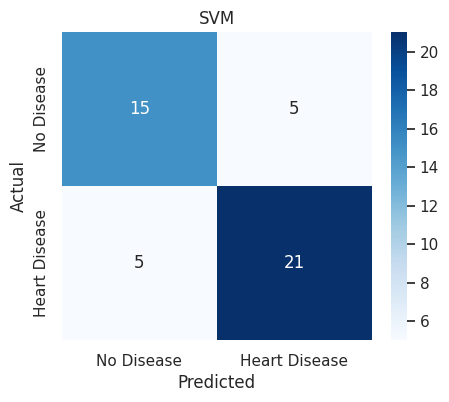

In [44]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Define the model
svm_model = SVC()

# Define hyperparameter grid for tuning
param_grid_svm = {
    'C': [0.1, 1, 10],                # Regularization parameter
    'kernel': ['linear', 'rbf'],      # Type of kernel to use
    'gamma': ['scale', 'auto']        # Kernel coefficient
}

# Perform Grid Search with Cross-Validation
grid_search_svm = GridSearchCV(svm_model, param_grid_svm, cv=5, scoring='accuracy', n_jobs=-1)  # n_jobs=-1 for parallel processing
grid_search_svm.fit(X_train, y_train)

# Print best hyperparameters found by Grid Search
print("Best Parameters found by Grid Search:")
print(grid_search_svm.best_params_)

# Use the best model to make predictions
y_pred_svm = grid_search_svm.best_estimator_.predict(X_test)

# Evaluate the model
print("\nClassification Report for SVM:")
print(classification_report(y_test, y_pred_svm))

# Confusion Matrix for SVM
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Disease", "Heart Disease"], yticklabels=["No Disease", "Heart Disease"])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(title)
    plt.show()

# Plot confusion matrix for SVM
plot_confusion_matrix(y_test, y_pred_svm, "SVM")
